**¿Que historia queremos contar?**



1.   ¿Cuantos accidentes fatales son atribuidos al consumo del alcohol?
2.   ¿Cuantos accidentes mortales hay en Sonora? (A traves del tiempo)
3.  ¿La gente en Sonora usa el cinturon de seguridad?
4.  En comparacion con otros estados, ¿cuantos accidentes en sonora hay?
5. Que tan "resposnsables" (No Alcholizado, menos accidentes, menos muertes) es Sonora en cuestion de transito (a traves del tiempo, ¿Estamos mejor, peor o igual?

Opcional - Ciclistas ...





In [26]:
# 1 - Imports - Libreries necessary
import requests
import os
import platform
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import zipfile
import seaborn as sns

In [27]:
# 2 - DWONLOAD FILES - Creation of folders and download file necessary

# Creation of a folder to contain all the files downloaded.
# Note WINDOWS USERS: For Windows users you must change the "/" to "\" for path directories
if(platform.system() == "Windows"):
    #!mkdir Data_Lab
    !mkdir Data_Lab\Accidentes_INEGI
    # !mkdir Data_Lab\Reg_Vehiculos_INEGI
    !mkdir Data_Lab\Censos
else:
    !mkdir Data_Lab
    !mkdir -p Data_Lab/Accidentes_INEGI
    !mkdir -p Data_Lab/Reg_Vehiculos_INEGI

# URL of the files, it is a zip file from INEGI (https://www.inegi.org.mx/programas/accidentes/#Datos_abiertos)
# It is a zip file conating multiple file (Catalog of Data, Diccionario y csv data of the accidents by year from 1997 -> 2021)
urlString_Accidentes = "https://www.inegi.org.mx/contenidos/programas/accidentes/datosabiertos/atus_anual_csv.zip"
urlString_Censo2000 = "https://www.inegi.org.mx/contenidos/programas/ccpv/2000/datosabiertos/cgpv2000_iter_26_csv.zip"
urlString_Censo2010 = "https://www.inegi.org.mx/contenidos/programas/ccpv/2010/datosabiertos/iter_26_2010_csv.zip"
urlString_Censo2020 = "https://www.inegi.org.mx/contenidos/programas/ccpv/2020/datosabiertos/iter/iter_26_cpv2020_csv.zip"
# urlString_Vehiculos = "https://www.inegi.org.mx/contenidos/programas/vehiculosmotor/datosabiertos/vmrc_anual_csv.zip"


# Folders and Zip files
folder_main = os.getcwd()
folder_DataLab = os.path.join(folder_main, "Data_Lab")
file_Accidentes = os.path.join(folder_DataLab, "Accidentes_INEGI.zip")
file_Censo2000 = os.path.join(folder_DataLab, "Censo2000.zip")
file_Censo2010 = os.path.join(folder_DataLab, "Censo2010.zip")
file_Censo2020 = os.path.join(folder_DataLab, "Censo2020.zip")
# file_Registro = os.path.join(folder_DataLab, "Accidentes_INEGI.zip")

folder_Accidentes = os.path.join(folder_DataLab, "Accidentes_INEGI")
folder_Censos= os.path.join(folder_DataLab, "Censos")
# folder_Registri = os.path.join(folder_DataLab, "Reg_Vehiculos_INEGI")

# 2.1 - Dowload 2 zip files (Accidents and Vehicles Register)
if(os.path.exists(file_Accidentes) == False):
    r = requests.get(urlString_Accidentes, stream = True)
    pathZipFile = os.path.join(folder_DataLab, "Accidentes_INEGI.zip")
    # Dowload file and store it on "Data_Lab" (Folder created)
    with open(pathZipFile, "wb") as file: 
        for block in r.iter_content(chunk_size = 1024):
            if block: 
             file.write(block) 
    # Extract the file 
    with zipfile.ZipFile(file_Accidentes, 'r') as zip_ref:
        zip_ref.extractall(folder_Accidentes)

# Censo 2000
if(os.path.exists(file_Censo2000) == False):
    r = requests.get(urlString_Censo2000, stream = True)
    pathZipFile = os.path.join(folder_DataLab, "Censo2000.zip")
    # Dowload file and store it on "Data_Lab" (Folder created)
    with open(pathZipFile, "wb") as file: 
        for block in r.iter_content(chunk_size = 1024):
            if block: 
             file.write(block) 
    # Extract the file 
    with zipfile.ZipFile(file_Censo2000, 'r') as zip_ref:
        zip_ref.extractall(folder_Censos)

# Censo 2010
if(os.path.exists(file_Censo2010) == False):
    r = requests.get(urlString_Censo2010, stream = True)
    pathZipFile = os.path.join(folder_DataLab, "Censo2010.zip")
    # Dowload file and store it on "Data_Lab" (Folder created)
    with open(pathZipFile, "wb") as file: 
        for block in r.iter_content(chunk_size = 1024):
            if block: 
             file.write(block) 
    # Extract the file 
    with zipfile.ZipFile(file_Censo2010, 'r') as zip_ref:
        zip_ref.extractall(folder_Censos)

# Censo 2020    
if(os.path.exists(file_Censo2020) == False):
    r = requests.get(urlString_Censo2020, stream = True)
    pathZipFile = os.path.join(folder_DataLab, "Censo2020.zip")
    # Dowload file and store it on "Data_Lab" (Folder created)
    with open(pathZipFile, "wb") as file: 
        for block in r.iter_content(chunk_size = 1024):
            if block: 
             file.write(block) 
    # Extract the file 
    with zipfile.ZipFile(file_Censo2020, 'r') as zip_ref:
        zip_ref.extractall(folder_Censos)


A subdirectory or file Data_Lab\Accidentes_INEGI already exists.
A subdirectory or file Data_Lab\Censos already exists.


In [ ]:
#3 - 1 SINGLE FILE - Creates a single DataFrame for all the files

folder_DataLab = os.path.join(folder_main, "Data_Lab")
path_Files_Accidentes = os.path.join(folder_DataLab,"Accidentes_INEGI", "conjunto_de_datos")
# path_Files_Registros = os.path.join(folder_DataLab,"Reg_Vehiculos_INEGI", "conjunto_de_datos")

# 3.1 Get all files names on the folder
list_files = os.listdir(path_Files_Accidentes)
df_complete = pd.DataFrame

# Just a variable to know if is the first file to read
isFirst_CSV = True
# 3.2 - loop from all files and add each csv to a single dataframe1
for xFile in list_files:
  pathCSV = os.path.join(path_Files_Accidentes, xFile)
  # Index_col = false due it has a delimiter at the end of each line ex: vlaue1,valueLast,
  df_temp =  pd.read_csv(pathCSV, index_col = False)
  if (isFirst_CSV):
    df_complete = df_temp
    isFirst_CSV = False
  else:
    df_complete = pd.concat([df_complete, df_temp], ignore_index=True)
    # df_complete = df_complete.concat(df_temp, ignore_index=True)

df_complete

In [48]:
df_test

,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,...,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,Total_Muertos,Total_Heridos,Fecha,Municipio_Nombre
207539,26,3,1997,1,18,0,17,Viernes,Sin accidente en esta zona,Accidente en carretera estatal,...,0,0,0,0,0,0,0,0,1997-01-17 18:0:00,Alamos
207540,26,4,1997,1,17,0,15,Miércoles,Sin accidente en esta zona,Accidente en camino rural,...,0,0,0,0,0,0,0,0,1997-01-15 17:0:00,Altar
207541,26,4,1997,1,19,0,30,Jueves,Sin accidente en esta zona,Accidente en camino rural,...,0,0,0,0,0,0,0,0,1997-01-30 19:0:00,Altar
207542,26,4,1997,1,3,0,14,Martes,Accidente en no intersección,Sin accidente en esta zona,...,0,0,0,0,0,0,0,0,1997-01-14 3:0:00,Altar
207543,26,14,1997,1,9,0,6,Lunes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,0,0,0,1997-01-6 9:0:00,Baviácora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511221,26,72,2021,12,2,35,5,Domingo,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,0,0,2,2021-12-5 2:35:00,San Ignacio Río Muerto
9511222,26,72,2021,12,21,39,12,Domingo,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,0,0,1,2021-12-12 21:39:00,San Ignacio Río Muerto
9511223,26,72,2021,12,15,55,25,Sabado,Sin accidente en esta zona,Accidente en camino rural,...,0,0,0,0,0,0,0,1,2021-12-25 15:55:00,San Ignacio Río Muerto
9511224,26,72,2021,12,8,59,26,Domingo,Sin accidente en esta zona,Accidente en camino rural,...,0,0,0,0,0,0,0,1,2021-12-26 8:59:00,San Ignacio Río Muerto


In [5]:
# Keep original Data Frame
df_Complete_Original = df_complete.copy()
# Drop columns which I considere not useful (On value for all rows, not interest)
df_complete.drop(["COBERTURA", "CLASACC", "ESTATUS"], axis=1, inplace = True)

In [6]:
df_complete.describe()

,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,AUTOMOVIL,CAMPASAJ,MICROBUS,...,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO
count,9.550884e+06,9.550884e+06,9.550884e+06,9.550884e+06,9.550884e+06,9.550884e+06,9.550884e+06,9.550884e+06,9.550884e+06,9.550884e+06,...,9.550884e+06,9.550884e+06,9.550884e+06,9.550884e+06,9.550884e+06,9.550884e+06,9.550884e+06,9.550884e+06,9.550884e+06,9.550884e+06
mean,1.586587e+01,3.712511e+01,2.009201e+03,6.585452e+00,1.334771e+01,2.412327e+01,1.567151e+01,1.222127e+00,1.897961e-01,2.382366e-02,...,4.172703e-03,1.248452e-01,3.384608e-03,5.475420e-02,6.615094e-04,1.093469e-02,2.603947e-04,3.540405e-03,7.517629e-05,3.898068e-04
std,7.872250e+00,4.511557e+01,6.777925e+00,3.464759e+00,8.119444e+00,1.838461e+01,8.815885e+00,7.670169e-01,4.490261e-01,1.589211e-01,...,9.573229e-02,6.040314e-01,6.048959e-02,2.458182e-01,2.651721e-02,1.063384e-01,2.367285e-02,7.153937e-02,8.670101e-03,2.218229e-02
min,1.000000e+00,1.000000e+00,1.997000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+00,1.200000e+01,2.004000e+03,4.000000e+00,9.000000e+00,7.000000e+00,8.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.600000e+01,2.700000e+01,2.009000e+03,7.000000e+00,1.400000e+01,2.500000e+01,1.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.100000e+01,4.100000e+01,2.015000e+03,1.000000e+01,1.800000e+01,4.000000e+01,2.300000e+01,2.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.200000e+01,9.980000e+02,2.021000e+03,1.200000e+01,9.900000e+01,9.900000e+01,3.200000e+01,9.000000e+00,9.000000e+00,9.000000e+00,...,3.600000e+01,9.100000e+01,1.000000e+01,1.400000e+01,1.000000e+01,6.000000e+00,5.000000e+01,3.000000e+01,1.000000e+00,2.000000e+00


In [28]:
# 4 - GET CITIES NAMES 
# Catalog paths : There CSV files that has the names of the cities by ID

pathCSV_Catalogo_Municipios = os.path.join(folder_Accidentes, "catalogos", "tc_municipio.csv")
pathCSV_Catalogo_Entidades = os.path.join(folder_Accidentes, "catalogos", "tc_entidad.csv")

df_Catalogo_Municipio = pd.read_csv(pathCSV_Catalogo_Municipios, index_col = False)
df_Catalogo_Entidad = pd.read_csv(pathCSV_Catalogo_Entidades, index_col = False)

# Get only "MUNICIPIOS" from Sonora
df_Catalogo_Municipio = df_Catalogo_Municipio[df_Catalogo_Municipio["ID_ENTIDAD"] == 26]

In [ ]:
# 5 - DATAFRAME SONORA

# 5.1 - Funtion to create column All_Deaths = Sum (All_Deaths by accident)
def Total_Muertos(fila):
  result = fila["CONDMUERTO"] + fila["PASAMUERTO"] + fila["PEATMUERTO"] + fila["CICLMUERTO"] + fila["OTROMUERTO"]
  return result

# 5.2 - Function to create column All_Injuries by accident
def Total_Heridos(fila):
  result = fila["CONDHERIDO"] + fila["PASAHERIDO"] + fila["PEATHERIDO"] + fila["CICLHERIDO"] + fila["OTROHERIDO"]
  return result

# 5.3 Function to Add Munucipio Name 
def Name_Municipio(fila):
  result = df_Catalogo_Municipio[df_Catalogo_Municipio["ID_MUNICIPIO"] == fila.ID_MUNICIPIO ]
  result = result.iloc[0]['NOM_MUNICIPIO']
  return result

def Name_Municipio2(fila):
  result = df_Catalogo_Municipio[df_Catalogo_Municipio["ID_MUNICIPIO"] == fila.name ]
  result = result.iloc[0]['NOM_MUNICIPIO']
  return result

def Name_Entidad(fila):
  result = df_Catalogo_Entidad[df_Catalogo_Entidad["ID_ENTIDAD"] == fila.name ]
  result = result.iloc[0]['NOM_ENTIDAD']
  return result

# Create a DateTime column
def Create_DateTime(fila):
  if len(str(fila["MES"])) == 1:
    result = str(fila["ANIO"]) + "-" + "0" + str(fila["MES"]) + "-" + str(fila["ID_DIA"]) + " " + str(fila["ID_HORA"]) + ":" + str(fila["ID_MINUTO"]) + ":00"
  else:
    result = str(fila["ANIO"]) + "-" + str(fila["MES"]) + "-" + str(fila["ID_DIA"]) + " " + str(fila["ID_HORA"]) + ":" + str(fila["ID_MINUTO"]) + ":00"
  return result


# 5.1 Create data frame only for Sonora
df_Sonora = df_complete[df_complete["ID_ENTIDAD"] == 26]

# 5.2 & 5.3 - Get total DEATHS and INJURIES
df_Sonora["Total_Muertos"] = df_Sonora.apply(Total_Muertos, axis=1)
df_Sonora["Total_Heridos"] = df_Sonora.apply(Total_Heridos, axis=1)
df_Sonora["Fecha"] = df_Sonora.apply(Create_DateTime, axis=1)
df_Sonora["Municipio_Nombre"] = df_Sonora.apply(Name_Municipio, axis=1)

# Make date column
#df_Sonora['Fecha_Tiempo'] =  pd.to_datetime(df_Sonora['Fecha'], format='%Y-%m-%d %H:%M:%S')

# 5.4 - Add "MUNICIPIOS" name (city name)
df_Sonora_Complete = df_Sonora.copy()
#df_Sonora_Complete["Municipio_Nombre"] = df_Sonora_Complete.apply(Name_Municipio, axis=1)

# 5.5 Deaths and people injured by "Municipio"
df_Sonora_Deaths = df_Sonora_Complete.groupby("ID_MUNICIPIO").agg({
    "Total_Muertos" : 'sum',
    "Total_Heridos" : 'sum',
})
df_complete_Death = df_complete.groupby("ID_ENTIDAD").agg({
    "CONDMUERTO" : "sum",
    "PASAMUERTO" : "sum",
    "PEATMUERTO" : "sum",
    "CICLMUERTO" : "sum",
    "OTROMUERTO" : "sum",
})

df_complete_Death["Entidad"] = df_complete_Death.apply(Name_Entidad, axis=1)
df_Sonora_Deaths["Municipio_Nombre"] = df_Sonora_Deaths.apply(Name_Municipio2, axis=1)


In [29]:
file_Sonora_csv = os.path.join(folder_DataLab, "Accidentes_Sonora_1997_2021.csv")
# df_Sonora_Complete.to_csv(file_Sonora_csv)
df_Sonora_Complete = pd.read_csv(file_Sonora_csv, index_col=0)

In [7]:
# Censos de poblacion
file_poblacion_2000_csv = os.path.join(folder_DataLab, "Censos", "cgpv2000_iter_26", "Conjunto_de_datos", "cgpv2000_iter_26.csv")
file_poblacion_2010_csv = os.path.join(folder_DataLab, "Censos", "iter_26_cpv2010", "Conjunto_de_datos", "iter_26_cpv2010.csv")
file_poblacion_2020_csv = os.path.join(folder_DataLab, "Censos", "iter_26_cpv2020", "Conjunto_de_datos", "conjunto_de_datos_iter_26CSV20.csv")

df_Poblacion_2000_completed = pd.read_csv(file_poblacion_2000_csv, index_col=False)
df_Poblacion_2010_completed = pd.read_csv(file_poblacion_2010_csv, index_col=False)
df_Poblacion_2020_completed = pd.read_csv(file_poblacion_2020_csv, index_col=False)
df_Poblacion_2000 = df_Poblacion_2000_completed[df_Poblacion_2000_completed["nom_loc"] == "TOTAL MUNICIPAL"]
df_Poblacion_2010 = df_Poblacion_2010_completed[df_Poblacion_2010_completed["nom_loc"] == "Total del Municipio"]
df_Poblacion_2020 = df_Poblacion_2020_completed[df_Poblacion_2020_completed["NOM_LOC"] == "Total del Municipio"]


In [12]:
# df_Sonora_Complete

listYears = df_Sonora_Complete.ANIO.unique()
listMunicipio = df_Sonora_Complete["ID_MUNICIPIO"].unique()
listYears.sort()
listMunicipio.sort()

list_DeathTotal = []
list_DeathDrunk = []
list_InjuryTotal = []
list_InjuryDrunk = []
list_poblacion = []
list_nombre = []

list_Year = []
list_Municipio = []
# Adding names and poblation
list_nombres = []
list_poblacion = []

# Get Tasa
list_Tasa_Deaths = []
list_Tasa_Injury = []
list_Tasa_Deaths_Alcohol = []
list_Tasa_Injury_Alcohol = []

for year in listYears:
    for mun in listMunicipio:
        totalDeath_year = sum(df_Sonora_Complete[(df_Sonora_Complete["ID_MUNICIPIO"] == mun) & (df_Sonora_Complete["ANIO"] == year)].Total_Muertos)
        totalDeath_Drunk_year = sum(df_Sonora_Complete[(df_Sonora_Complete["ID_MUNICIPIO"] == mun) & (df_Sonora_Complete["ANIO"] == year) & (df_Sonora_Complete["ALIENTO"] == "Sí")].Total_Muertos)
        totalInjury = sum(df_Sonora_Complete[(df_Sonora_Complete["ID_MUNICIPIO"] == mun) & (df_Sonora_Complete["ANIO"] == year)].Total_Heridos)
        totalInjury_Drunk_year = sum(df_Sonora_Complete[(df_Sonora_Complete["ID_MUNICIPIO"] == mun) & (df_Sonora_Complete["ANIO"] == year) & (df_Sonora_Complete["ALIENTO"] == "Sí")].Total_Heridos)

        list_DeathTotal.append(totalDeath_year)
        list_DeathDrunk.append(totalDeath_Drunk_year)
        list_InjuryTotal.append(totalInjury)
        list_InjuryDrunk.append(totalInjury_Drunk_year)

        list_Year.append(year)
        list_Municipio.append(mun)
        list_nombres.append(df_Catalogo_Municipio[df_Catalogo_Municipio["ID_MUNICIPIO"] == mun].iloc[0]["NOM_MUNICIPIO"])
        pobTotal = 0
        if year < 2010:
            pobTotal = df_Poblacion_2000[df_Poblacion_2000["mun"] == mun].iloc[0]["pobtot"]
            # list_poblacion.append()        
        elif year < 2020:
            pobTotal = df_Poblacion_2010[df_Poblacion_2010["mun"] == mun].iloc[0]["pobtot"]
            # list_poblacion.append(df_Poblacion_2010[df_Poblacion_2010["mun"] == mun].iloc[0]["pobtot"])
        else:
            pobTotal = df_Poblacion_2020[df_Poblacion_2020["MUN"] == mun].iloc[0]["POBTOT"]
            # list_poblacion.append(df_Poblacion_2020[df_Poblacion_2020["MUN"] == mun].iloc[0]["POBTOT"]) 

        list_poblacion.append(pobTotal)
        list_Tasa_Deaths.append((totalDeath_year / pobTotal) * 1000 )
        list_Tasa_Injury.append((totalInjury / pobTotal) * 1000 )
        list_Tasa_Deaths_Alcohol.append((totalDeath_Drunk_year / pobTotal) * 1000 )
        list_Tasa_Injury_Alcohol.append((totalInjury_Drunk_year / pobTotal) * 1000 )

df_Municipio_Deaths = pd.DataFrame()
df_Municipio_Deaths["Years"] = list_Year
df_Municipio_Deaths["Id_Municipio"] = list_Municipio
df_Municipio_Deaths["Total_Deaths"] = list_DeathTotal
df_Municipio_Deaths["Total_Deaths_Drunk"] = list_DeathDrunk
df_Municipio_Deaths["Total_Injury"] = list_InjuryTotal
df_Municipio_Deaths["Total_Injury_Drunk"] = list_InjuryDrunk

df_Municipio_Deaths["Nombre_Municipio"] = list_nombres
df_Municipio_Deaths["Poblacion"] = list_poblacion

df_Municipio_Deaths["Tasa_Muertos"] = list_Tasa_Deaths
df_Municipio_Deaths["Tasa_Heridos"] = list_Tasa_Injury
df_Municipio_Deaths["Tasa_Muertos_Alcohol"] = list_Tasa_Deaths_Alcohol
df_Municipio_Deaths["Tasa_Heridos_Alcohol"] = list_Tasa_Injury_Alcohol

df_Municipio_Deaths.head()

,Years,Id_Municipio,Total_Deaths,Total_Deaths_Drunk,Total_Injury,Total_Injury_Drunk,Nombre_Municipio,Poblacion,Tasa_Muertos,Tasa_Heridos,Tasa_Muertos_Alcohol,Tasa_Heridos_Alcohol
0,1997,1,0,0,0,0,Aconchi,2420,0.000000,0.000000,0.000000,0.00000
1,1997,2,0,0,0,0,Agua Prieta,61944,0.000000,0.000000,0.000000,0.00000
2,1997,3,4,1,21,6,Alamos,25152,0.159033,0.834924,0.039758,0.23855
3,1997,4,0,0,1,0,Altar,7253,0.000000,0.137874,0.000000,0.00000
4,1997,5,1,0,0,0,Arivechi,1484,0.673854,0.000000,0.000000,0.00000


In [ ]:
# Get Tasa
list_Tasa_Deaths = []
list_Tasa_Injury = []
list_Tasa_Deaths_Alcohol = []
list_Tasa_Injury_Alcohol = []

for index, row in df_Municipio_Deaths.iterrows():
    year = row["Years"]
    num_municipio = row["Id_Municipio"]
    list_nombres.append(df_Catalogo_Municipio[df_Catalogo_Municipio["ID_MUNICIPIO"] == num_municipio].iloc[0]["NOM_MUNICIPIO"])
    if year < 2010:
        list_poblacion.append(df_Poblacion_2000[df_Poblacion_2000["mun"] == num_municipio].iloc[0]["pobtot"])        
    elif year < 2020:
        list_poblacion.append(df_Poblacion_2010[df_Poblacion_2010["mun"] == num_municipio].iloc[0]["pobtot"])
    else:
        list_poblacion.append(df_Poblacion_2020[df_Poblacion_2020["MUN"] == num_municipio].iloc[0]["POBTOT"])

In [ ]:
# df_Municipio_Deaths[df_Municipio_Deaths["Years"] == 2018].sort_values(by="p_Muertos", ascending=False).head(10)
# df_Municipio_Deaths[df_Municipio_Deaths["p_Heridos_Drunk"] >= 20]
# df_Municipio_Deaths[df_Municipio_Deaths["p_Heridos_Drunk"] >= 20].p_Heridos_Drunk.unique()
df_Sonora_Tasa_Muertes = df_Municipio_Deaths.copy()
df_Sonora_Tasa_Heridos = df_Municipio_Deaths.copy()
df_Sonora_Tasa_Muertes_Al = df_Municipio_Deaths.copy()
df_Sonora_Tasa_Heridos_Al = df_Municipio_Deaths.copy()

df_Sonora_Tasa_Muertes = df_Sonora_Tasa_Muertes[0:0]
df_Sonora_Tasa_Heridos = df_Sonora_Tasa_Heridos[0:0]
df_Sonora_Tasa_Muertes_Al = df_Sonora_Tasa_Muertes_Al[0:0]
df_Sonora_Tasa_Heridos_Al = df_Sonora_Tasa_Heridos_Al[0:0]

for year in df_Municipio_Deaths["Years"].unique():
    df_Sonora_Tasa_Muertes = df_Sonora_Tasa_Muertes.append(df_Municipio_Deaths[(df_Municipio_Deaths["Years"] == year) & (df_Municipio_Deaths["Tasa_Muertos"] > 1 )].sort_values(by="Tasa_Muertos", ascending=False).head(5), ignore_index="True" )
    df_Sonora_Tasa_Heridos = df_Sonora_Tasa_Heridos.append(df_Municipio_Deaths[(df_Municipio_Deaths["Years"] == year) & (df_Municipio_Deaths["Tasa_Heridos"] > 1 )].sort_values(by="Tasa_Heridos", ascending=False).head(5), ignore_index="True" )
    df_Sonora_Tasa_Muertes_Al = df_Sonora_Tasa_Muertes_Al.append(df_Municipio_Deaths[(df_Municipio_Deaths["Years"] == year) & (df_Municipio_Deaths["Tasa_Muertos_Alcohol"] > 1 )].sort_values(by="Tasa_Muertos_Alcohol", ascending=False).head(5), ignore_index="True" )
    df_Sonora_Tasa_Heridos_Al = df_Sonora_Tasa_Heridos_Al.append(df_Municipio_Deaths[(df_Municipio_Deaths["Years"] == year) & (df_Municipio_Deaths["Tasa_Heridos_Alcohol"] > 1 )].sort_values(by="Tasa_Heridos_Alcohol", ascending=False).head(5), ignore_index="True" )


In [31]:
df_Municipio_Deaths[(df_Municipio_Deaths["Years"] == 2012) & (df_Municipio_Deaths["p_Muertos"] > 1 )].sort_values(by="p_Muertos", ascending=False).head(10)

,Years,Id_Municipio,Total_Deaths,Total_Deaths_Drunk,Total_Injury,Total_Injury_Drunk,Nombre_Municipio,Poblacion,Tasa_Muertos,Tasa_Heridos,Tasa_Muertos_Alcohol,Tasa_Heridos_Alcohol
0,1997,1,0,0,0,0,Aconchi,2420,0.000000,0.000000,0.000000,0.000000
1,1997,2,0,0,0,0,Agua Prieta,61944,0.000000,0.000000,0.000000,0.000000
2,1997,3,4,1,21,6,Alamos,25152,0.159033,0.834924,0.039758,0.238550
3,1997,4,0,0,1,0,Altar,7253,0.000000,0.137874,0.000000,0.000000
4,1997,5,1,0,0,0,Arivechi,1484,0.673854,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2021,68,0,0,0,0,Villa Pesqueira,1043,0.000000,0.000000,0.000000,0.000000
1796,2021,69,0,0,0,0,Yécora,4793,0.000000,0.000000,0.000000,0.000000
1797,2021,70,1,0,1,0,General Plutarco Elías Calles,13627,0.073384,0.073384,0.000000,0.000000
1798,2021,71,0,0,43,0,Benito Juárez,21692,0.000000,1.982298,0.000000,0.000000


In [25]:
# fig = px.scatter(df_Sonora_Tasa_Heridos_Al, x="Years", y="Tasa_Muertos_Alcohol", color="Nombre_Municipio",
# title="Tasa de Heridos en accidentes con conductor alcoholizado (por cada 1000 Habitantes)")
# fig.show()

fig = px.line(df_Sonora_Tasa_Muertes_Al, x="Years", y="Tasa_Muertos_Alcohol", color="Nombre_Municipio", markers="True",
title="Tasa de Muertos en accidentes con conductor alcoholizado (por cada 1000 Habitantes) ")
fig.show()
# df_Sonora_Tasa_Muertes


In [13]:
fig = px.scatter(df_Municipio_Deaths, x="Years", y="Total_Deaths_Drunk", color="Nombre_Municipio")
fig.show()

In [78]:
df_Municipio_Deaths[df_Municipio_Deaths["Years"] == 1997].head(20)

,Years,Id_Municipio,Total_Deaths,Total_Deaths_Drunk,Total_Injury,Total_Injury_Drunk,Nombre_Municipio,Poblacion
0,1997,1,0,0,0,0,Aconchi,2420
1,1997,2,0,0,0,0,Agua Prieta,61944
2,1997,3,4,1,21,6,Alamos,25152
3,1997,4,0,0,1,0,Altar,7253
4,1997,5,1,0,0,0,Arivechi,1484
5,1997,6,2,0,5,1,Arizpe,3396
6,1997,7,0,0,0,0,Atil,718
7,1997,8,0,0,0,0,Bacadéhuachi,1348
8,1997,9,0,0,0,0,Bacanora,943
9,1997,10,0,0,0,0,Bacerac,1366


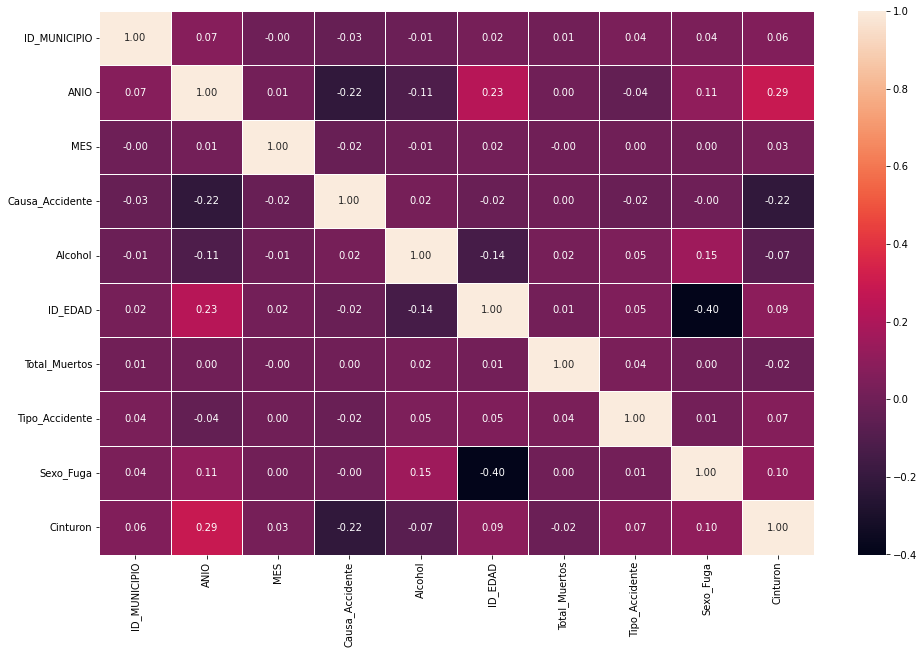

In [19]:
# Correlation matrix 
# df_Sonora_Tidy = df_Sonora_Complete.copy()
df_Sonora_Tidy = df_Sonora_Complete.copy()
# One Hot Encoding for "Causa Accidente"
label_encoder = LabelEncoder()
df_Sonora_Tidy["Causa_Accidente"] = label_encoder.fit_transform(df_Sonora_Tidy["CAUSAACCI"])
df_Sonora_Tidy["Alcohol"] = label_encoder.fit_transform(df_Sonora_Tidy["ALIENTO"])
df_Sonora_Tidy["Tipo_Accidente"] = label_encoder.fit_transform(df_Sonora_Tidy["TIPACCID"])
df_Sonora_Tidy["Sexo_Fuga"] = label_encoder.fit_transform(df_Sonora_Tidy["SEXO"])
df_Sonora_Tidy["Cinturon"] = label_encoder.fit_transform(df_Sonora_Tidy["CINTURON"])

df_Sonora_Tidy = df_Sonora_Tidy[["ID_MUNICIPIO","ANIO","MES","Causa_Accidente","Alcohol", "ID_EDAD", "Total_Muertos", "Tipo_Accidente", "Sexo_Fuga", "Cinturon"]]

plt.figure(figsize=(16,10))
sn.heatmap(df_Sonora_Tidy.corr(), annot=True, linewidth=.5, fmt=".2f")
plt.show()

## Correlacion

Una vez analizado a traves de un diagrama de pearson, encontré algunas relaciones interesantes, entonces procederé a realziar un analisis rapido de las variables relacionadas.
- Año VS Edad
- Causa Accidente VS Año
- Año VS Uso del cinturon
- Edad VS Sexo

Text(0.5, 1.0, 'Accidentes de Trnasito por EDAD en Sonora')

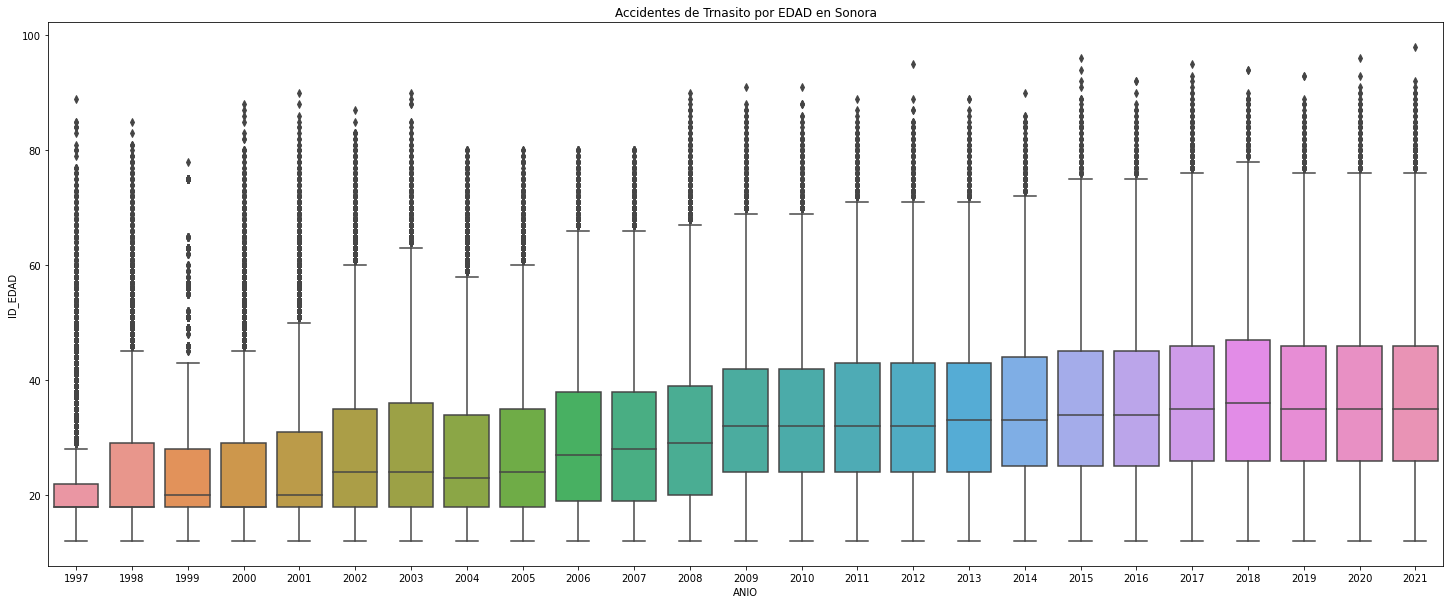

In [87]:
# Remove 0 and 99 from the data
df_Sonora_Edad_vs_Anio = df_Sonora[(df_Sonora.ID_EDAD != 0) & (df_Sonora.ID_EDAD != 99)]
plt.figure(figsize=(25,10))
ax = sns.boxplot(x="ANIO", y ="ID_EDAD", data = df_Sonora_Edad_vs_Anio)
plt.title("Accidentes de Trnasito por EDAD en Sonora")
# plt.boxplot(df_Sonora_Edad_vs_Anio["ID_EDAD"], vert=False, patch_artist=True)
# plt.show()

Text(0.5, 1.0, 'Causa accidentes de Trnasito por año en Sonora')

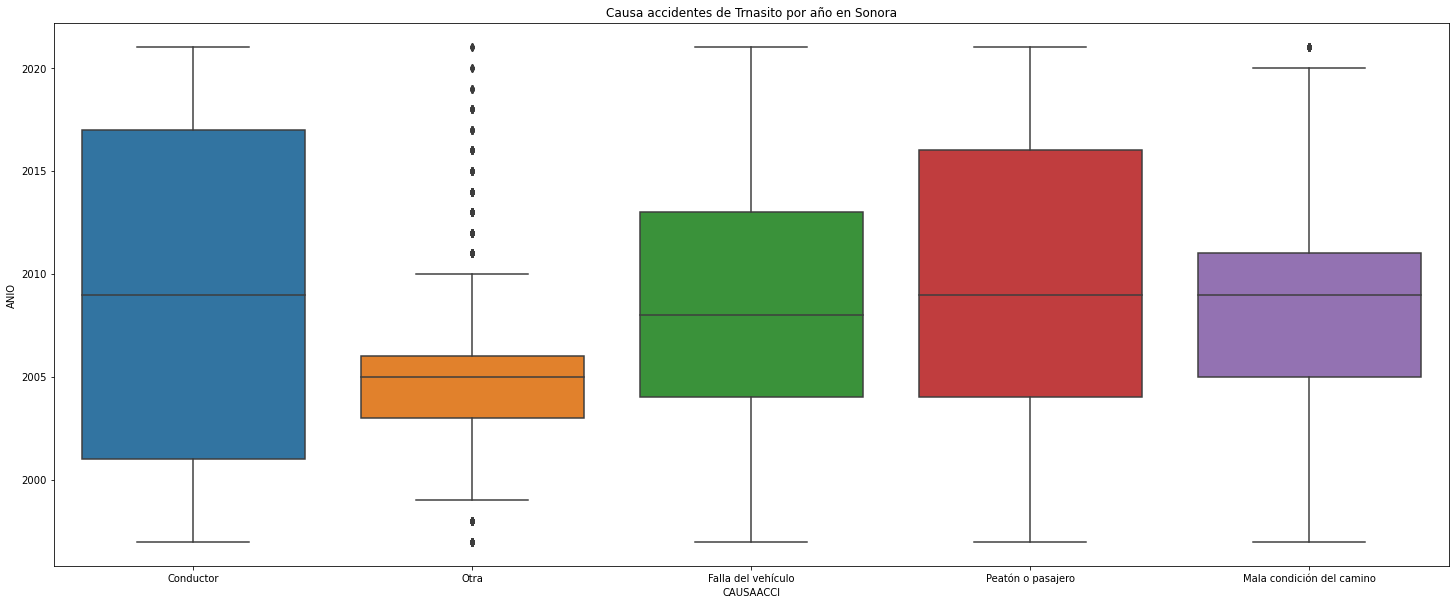

In [21]:
plt.figure(figsize=(25,10))
ax = sns.boxplot(x="CAUSAACCI", y ="ANIO", data = df_Sonora_Complete[(df_Sonora.ID_EDAD != 0) & (df_Sonora.ID_EDAD != 99)])
plt.title("Causa accidentes de Trnasito por año en Sonora")

Vamos a analizar la distribucion de los datos con personas alcolizadas

Text(0.5, 1.0, 'Accidentes de Trnasito por EDAD y con aliento Alcholico en Sonora')

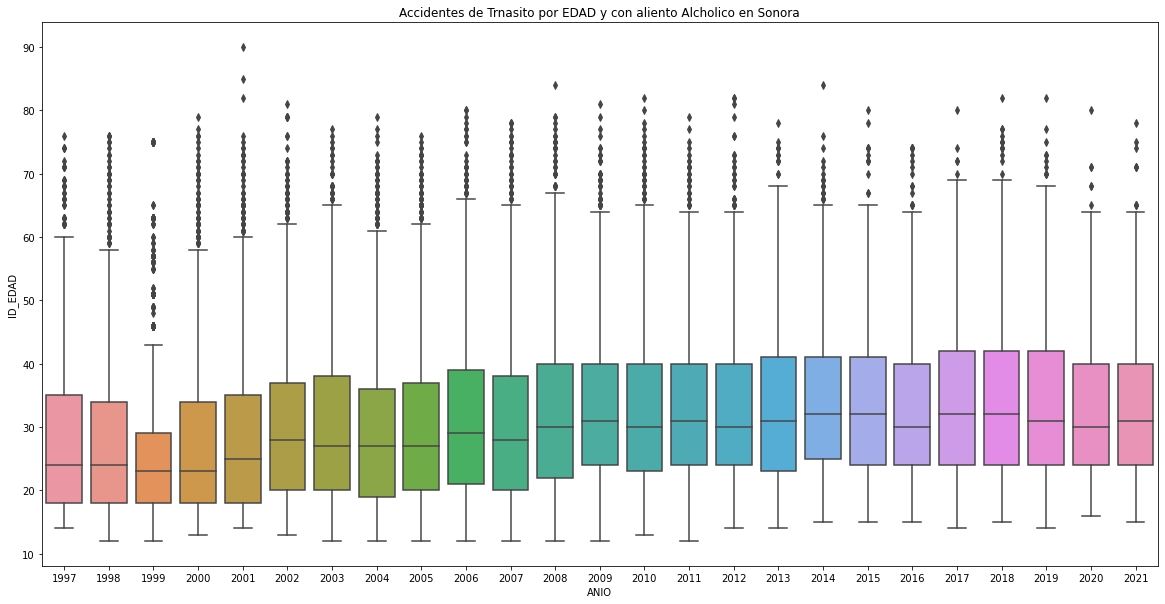

In [16]:
# Remove 0  and 99 from the data
df_Sonora_Edad_vs_Anio = df_Sonora_Complete[(df_Sonora_Complete.ID_EDAD != 0) & (df_Sonora_Complete.ID_EDAD != 99) & (df_Sonora_Complete["ALIENTO"] == "Sí")]
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="ANIO", y ="ID_EDAD", data = df_Sonora_Edad_vs_Anio)
plt.title("Accidentes de Trnasito por EDAD y con aliento Alcholico en Sonora")

Text(0.5, 1.0, 'Accidentes de Trnasito por EDAD y con aliento Alcholico con al menos 1 persona muerta en Sonora')

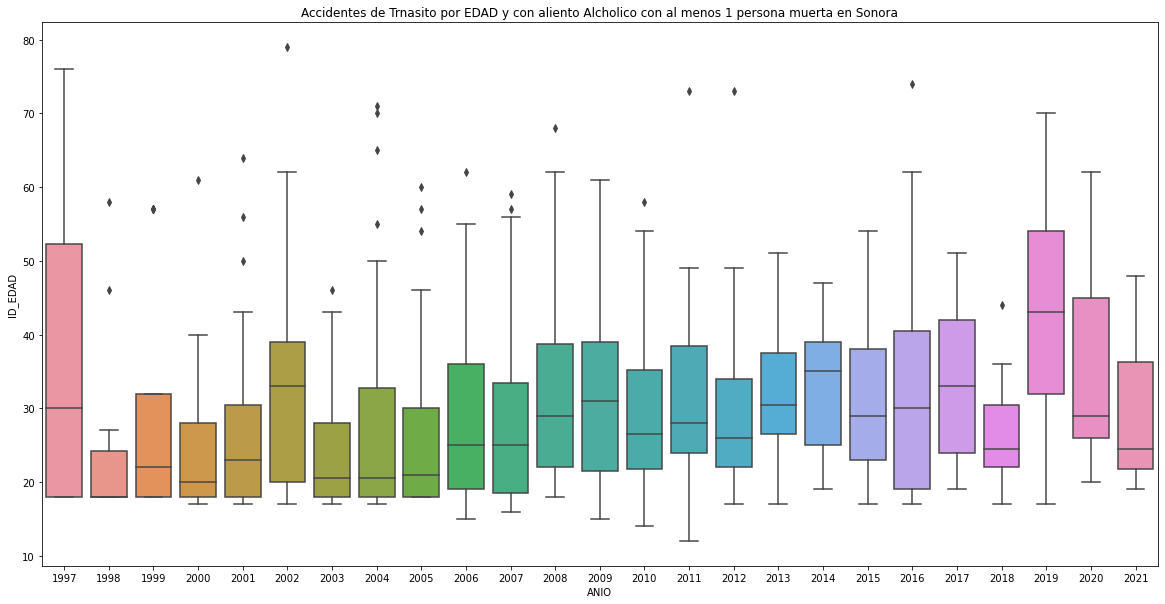

In [18]:
# Remove 0  and 99 from the data
df_Sonora_Edad_vs_Anio = df_Sonora_Complete[(df_Sonora_Complete.ID_EDAD != 0) & (df_Sonora_Complete.ID_EDAD != 99) & (df_Sonora_Complete["ALIENTO"] == "Sí") & (df_Sonora_Complete["Total_Muertos"] >= 1)]
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="ANIO", y ="ID_EDAD", data = df_Sonora_Edad_vs_Anio)
plt.title("Accidentes de Trnasito por EDAD y con aliento Alcholico con al menos 1 persona muerta en Sonora")
# plt.boxplot(df_Sonora_Edad_vs_Anio["ID_EDAD"], vert=False, patch_artist=True)
# plt.show()

In [10]:
# Personas muertas por accidentes por alcohol

df_temp1 = df_Sonora_Complete[(df_Sonora_Complete.ID_EDAD != 0) & (df_Sonora_Complete.ID_EDAD != 99) & (df_Sonora_Complete["Total_Muertos"] >= 1)]
df_temp2 = df_Sonora_Complete[(df_Sonora_Complete.ID_EDAD != 0) & (df_Sonora_Complete.ID_EDAD != 99) & (df_Sonora_Complete["ALIENTO"] == "Sí") & (df_Sonora_Complete["Total_Muertos"] >= 1)]

df_temp1 = df_temp1.groupby("ANIO").agg({
    "Total_Muertos" : "sum"    
})
df_temp2 = df_temp2.groupby("ANIO").agg({
    "Total_Muertos" : "sum"    
})

df_temp1["Total_Muertos_Alcohol"] = df_temp2["Total_Muertos"]

df_temp3 = df_temp1.copy()
df_temp3["Total_Muertos_Otros"] = df_temp1["Total_Muertos"] - df_temp1["Total_Muertos_Alcohol"]

# plt.figure(figsize=(20,10))
# ax = sns.boxplot(x="ANIO", y ="ID_EDAD", data = df_Sonora_Edad_vs_Anio)
# plt.title("Accidentes de Trnasito por EDAD y con aliento Alcholico con al menos 1 persona muerta en Sonora")


In [11]:
df_temp3

,Total_Muertos,Total_Muertos_Alcohol,Total_Muertos_Otros
ANIO,,,
1997,151,11,140
1998,154,31,123
1999,237,28,209
2000,255,29,226
2001,251,33,218
2002,231,50,181
2003,189,29,160
2004,212,40,172
2005,209,32,177


In [23]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_temp3.head(8).index,
    y=df_temp3.Total_Muertos_Otros,
    name='Total Muertos',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=df_temp3.head(8).index,
    y=df_temp1.Total_Muertos_Alcohol,
    name='Total Muertos Alcohol',
    marker_color='indianred'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-80, title="Muertes por año en Sonora, con Alcohol y Otras causas")
fig.show()

In [55]:
#len(df_Sonora_Complete[(df_Sonora_Complete["CICLMUERTO"] >= 1) & (df_Sonora_Complete["ALIENTO"] == 'Sí') ].index)
df_test = df_Sonora_Complete[(df_Sonora_Complete["OTROHERIDO"] >= 1) & (df_Sonora_Complete["ALIENTO"] == 'Sí')]
totalM = sum(df_Sonora_Complete["OTROHERIDO"])
totalM2 = sum(df_test["OTROHERIDO"])

print("Total Muertos = " + str(totalM) + " Alchol Muertos = " + str(totalM2) + " % = " + str((totalM2 * 100) / totalM ))


Total Muertos = 1802 Alchol Muertos = 374 % = 20.754716981132077


In [40]:
df_Sonora_Complete.columns

Index(['ID_ENTIDAD', 'ID_MUNICIPIO', 'ANIO', 'MES', 'ID_HORA', 'ID_MINUTO',
       'ID_DIA', 'DIASEMANA', 'URBANA', 'SUBURBANA', 'TIPACCID', 'AUTOMOVIL',
       'CAMPASAJ', 'MICROBUS', 'PASCAMION', 'OMNIBUS', 'TRANVIA', 'CAMIONETA',
       'CAMION', 'TRACTOR', 'FERROCARRI', 'MOTOCICLET', 'BICICLETA',
       'OTROVEHIC', 'CAUSAACCI', 'CAPAROD', 'SEXO', 'ALIENTO', 'CINTURON',
       'ID_EDAD', 'CONDMUERTO', 'CONDHERIDO', 'PASAMUERTO', 'PASAHERIDO',
       'PEATMUERTO', 'PEATHERIDO', 'CICLMUERTO', 'CICLHERIDO', 'OTROMUERTO',
       'OTROHERIDO', 'NEMUERTO', 'NEHERIDO', 'Total_Muertos', 'Total_Heridos',
       'Fecha', 'Municipio_Nombre'],
      dtype='object')

In [ ]:
df_Sonora_Cinturon = df_Sonora[(df_Sonora["Total_Muertos"] >= 1) & (df_Sonora["ANIO"] <= 2008)]
fig = px.bar(df_Sonora_Cinturon, x="ANIO", y="Total_Muertos", color="CINTURON", title="Uso de cinturon en accidentes mortales")
fig.show()

In [ ]:
# df_Sonora_Cinturon = df_Sonora[(df_Sonora["Total_Muertos"] >= 1) & (df_Sonora["ANIO"] >= 2009)]
# fig = px.bar(df_Sonora_Cinturon, x="ANIO", y="Total_Muertos", color="CINTURON", title="Uso de cinturon en accidentes mortales")
# fig.show()

fig = px.bar(df_Sonora_Complete[df_Sonora_Complete["ALIENTO"] == "Sí"], x="ANIO", y="Total_Muertos")
fig.show()

# fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
#                     subplot_titles=['Accidentes Mortales', 'Accidentes Mortales con Alcohol'])

# fig.add_trace(go.bar(df_Sonora_Complete[df_Sonora_Complete["ALIENTO"] == "Sí"], x="ANIO", y="Total_Muertos"), 1, 1)

# fig.add_trace(go.Pie(df_Sonora_Complete, x="ANIO", y="Total_Muertos"), 1, 2)

# fig.update_layout(title_text='Uso del cinturon en accidentes - Sonora')

# fig.show()

In [ ]:
# Distribucion de total de accidentes mortales doonde la persona estaba alcolizada
df_Sonora_Alchol = df_Sonora[(df_Sonora["ANIO"] >= 2005) & (df_Sonora["Total_Muertos"] >= 1)]
plt.figure(figsize=(25,15))
ax = sns.displot(x="ANIO", hue ="ALIENTO", data = df_Sonora_Alchol, multiple="dodge")
plt.xticks(rotation=90)

Aqui detallaremos el porcentaje de accidentes de trafico alcolizados de cada municipio en relacion con sus habitantes


In [ ]:
# 6 - TIDY DF'S - Create Data Frame tidy's

# Create chart of how many persons (sexo) "Se fugó" por municipio y por año - DONE
df_Sonora_Fugados = df_Sonora_Complete[df_Sonora_Complete['SEXO'] == 'Se fugó']
# Cuanta gente alcoholica (Aliento) con respecto al año y personas muertas
df_Sonora_Alchol = df_Sonora_Complete[df_Sonora_Complete['ALIENTO'] == 'Sí']
# Conductor usaba el cinturon (Top 3 municipio "Responsable del cinturon")
df_Sonora_Cinturon = df_Sonora_Complete[df_Sonora_Complete['CINTURON'] == 'Sí']

df_deaths_tidy = df_Sonora_Deaths.sort_values(by=["Total_Muertos"], ascending=False).head(10)

df_Sonora_Complete_Cinturon = df_Sonora_Complete.groupby("CINTURON").agg({
    "CINTURON" : 'count',
})
df_Sonora_Complete_Cinturon.columns = ["Uso_Cinturon"]
df_Sonora_Complete_Cinturon = df_Sonora_Complete_Cinturon.sort_values(by=["CINTURON"])



**Sonora ocupa el el 2° lugar a nivel nacional de ciclistas muertos en accidentes de transitos**

In [ ]:
# Sonora ocupa 1 el 2° lugar en ciclistas muertos en registros de accidentes de transito
fig = px.bar(df_complete_Death.sort_values(by="CICLMUERTO", ascending=False).head(10), x="Entidad",  y="CICLMUERTO", title='Top 10 numero de Ciclistas muertos en accidentes 1997-2021 - México')
fig.show()


In [ ]:
# 
fig = px.bar(df_deaths_tidy, x="Municipio_Nombre",  y="Total_Muertos", title='Top 10 municipios con numero de personas muertas en accidentes 1997-2021 - Sonora')
fig.show()

In [ ]:
df_deaths_tidy

,Total_Muertos,Total_Heridos
ID_MUNICIPIO,,
30,1203,52533
18,798,30347
55,543,14906
17,445,10167
42,393,7912
43,364,14160
26,296,3420
29,293,13803
48,233,3302


In [ ]:
df_Sonora_Complete_Cinturon_Todos = df_Sonora_Complete.groupby("CINTURON").agg({
    "CINTURON" : 'count',
})
df_Sonora_Complete_Cinturon_2021 = df_Sonora_Complete[df_Sonora_Complete["ANIO"] == 2021].groupby("CINTURON").agg({
    "CINTURON" : 'count',
})

labels = df_Sonora_Complete_Cinturon_Todos.index

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['1997-2021', '2021'])

fig.add_trace(go.Pie(labels=labels, values=df_Sonora_Complete_Cinturon_Todos["CINTURON"],
                     name="Uso del cinturon en accidentes - Sonora"), 1, 1)

fig.add_trace(go.Pie(labels=labels, values=df_Sonora_Complete_Cinturon_2021["CINTURON"],
                     name="Uso del cinturon en accidentes 2021 - Sonora"), 1, 2)

fig.update_layout(title_text='Uso del cinturon en accidentes - Sonora')

fig.show()

In [ ]:
df_Sonora_Cinturon_Mortales_Todos= df_Sonora_Complete[df_Sonora_Complete['Total_Muertos'] > 0].groupby("CINTURON").agg({
    "CINTURON" : 'count',
})

df_Sonora_Cinturon_Mortales_2021 = df_Sonora_Complete[(df_Sonora_Complete['Total_Muertos'] > 0) & (df_Sonora_Complete['ANIO'] == 2021)].groupby("CINTURON").agg({
    "CINTURON" : 'count',
})


labels = df_Sonora_Cinturon_Mortales_Todos.index

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['1997-2021', '2021'])

fig.add_trace(go.Pie(labels=labels, values=df_Sonora_Cinturon_Mortales_Todos["CINTURON"],
                     name="Uso del cinturon en accidentes Mortales - Sonora"), 1, 1)

fig.add_trace(go.Pie(labels=labels, values=df_Sonora_Cinturon_Mortales_2021["CINTURON"],
                     name="Uso del cinturon en accidentes Mortales 2021 - Sonora"), 1, 2)

fig.update_layout(title_text='Uso del cinturon en accidentes MORTALES - Sonora')

fig.show()

In [ ]:
df_Sonora_Aliento_Todos = df_Sonora_Complete[df_Sonora_Complete['Total_Muertos'] > 0].groupby("ALIENTO").agg({
    "Total_Muertos" : 'count',
})

df_Sonora_Aliento_2021= df_Sonora_Complete[(df_Sonora_Complete['Total_Muertos'] > 0) & (df_Sonora_Complete['ANIO'] == 2021)].groupby("ALIENTO").agg({
    "Total_Muertos" : 'count',
})

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['1997-2021', '2021'])

fig.add_trace(go.Pie(labels=labels, values=df_Sonora_Aliento_Todos["Total_Muertos"],
                     name="Personas con aliento alcholico - Sonora"), 1, 1)

fig.add_trace(go.Pie(labels=labels, values=df_Sonora_Aliento_2021["Total_Muertos"],
                     name="Personas con aliento alcholico 2021 - Sonora"), 1, 2)

fig.update_layout(title_text='Personas con aliento alcholico - Sonora')

fig.show()